In [1]:
import os
import cv2
import tqdm
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


Boxes

In [ ]:
# x = []
# y = []

# size = 360

# batch_size = 1
# num_classes = 2
# epochs = 12

In [ ]:
# dir_box = os.listdir('boxes')
# #dir_box.remove('.DS_Store')

# for i in tqdm.tqdm(dir_box[:500]):
#     img = cv2.imread('boxes/' + str(i))
#     img = cv2.resize(img, (size, size),  interpolation = cv2.INTER_AREA)
#     x.append(img)
#     y.append(1)

Non-boxes

In [ ]:
# dir_box = os.listdir('no_boxes')
# #dir_box.remove('.DS_Store')

# for i in tqdm.tqdm(dir_box[:500]):
#     img = cv2.imread('no_boxes/' + str(i))
#     img = cv2.resize(img, (size, size),  interpolation = cv2.INTER_AREA)
#     x.append(img)
#     y.append(0)

In [ ]:
# x = np.array(x)
# y = np.array(y)

In [ ]:
# plt.imshow(x[4])

In [ ]:
# for i in tqdm.tqdm(range(x.shape[0])):
#     #X[i] = cv2.GaussianBlur(X[i], (3,3), 0)
#     x[i] = cv2.fastNlMeansDenoisingColored(x[i],None,10,10,7,21)

In [ ]:
# plt.imshow(x[4])

In [ ]:
# X, y = shuffle(x, y)

In [ ]:
# X = X/255

In [ ]:
# plt.imshow(X[0])

In [2]:
X = np.load('train_data.npy')
y = np.load('train_label.npy')

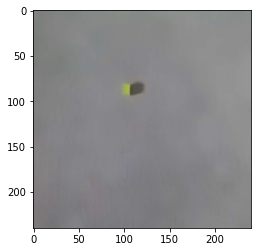

In [3]:
plt.imshow(X[0])

Train Test split of data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [5]:
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [8]:
size = X_train[0].shape[0]

In [9]:
input_shape = (size, size, 3)

In [10]:
# model.add(Convolution2D(64, 3, 3, use_bias=False))
# model.add(BatchNormalization(axis=bn_axis))
# model.add(Activation('relu'))

In [11]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(12, (5, 5)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(24, (5, 5)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.25))
model.add(Conv2D(48, (5, 5)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 236, 236, 6)       456       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 232, 232, 12)      1812      
_________________________________________________________________
activation_1 (Activation)    (None, 232, 232, 12)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 116, 116, 12)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 24)      7224      
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 24)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 24)       

In [13]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
          batch_size=25,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 1638 samples, validate on 702 samples
Epoch 1/5
1638/1638 [==============================] - 175s 107ms/step - loss: 0.5885 - accuracy: 0.6368 - val_loss: 0.5101 - val_accuracy: 0.7194
Epoch 2/5
1638/1638 [==============================] - 150s 92ms/step - loss: 0.5328 - accuracy: 0.7106 - val_loss: 0.6588 - val_accuracy: 0.5157
Epoch 3/5
1638/1638 [==============================] - 146s 89ms/step - loss: 0.4372 - accuracy: 0.7582 - val_loss: 0.4616 - val_accuracy: 0.7564
Epoch 4/5
1638/1638 [==============================] - 132s 81ms/step - loss: 0.3981 - accuracy: 0.7589 - val_loss: 0.3768 - val_accuracy: 0.7664
Epoch 5/5
1638/1638 [==============================] - 128s 78ms/step - loss: 0.3994 - accuracy: 0.7668 - val_loss: 0.5894 - val_accuracy: 0.6681


In [19]:
history = model.fit(X_train, y_train,
          batch_size=25,
          epochs=30,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 1638 samples, validate on 702 samples
Epoch 1/30
1638/1638 [==============================] - 129s 79ms/step - loss: 0.4315 - accuracy: 0.7332 - val_loss: 0.3213 - val_accuracy: 0.7792
Epoch 2/30
1638/1638 [==============================] - 128s 78ms/step - loss: 0.2900 - accuracy: 0.8364 - val_loss: 0.3163 - val_accuracy: 0.8732
Epoch 3/30
1638/1638 [==============================] - 128s 78ms/step - loss: 0.3347 - accuracy: 0.8419 - val_loss: 0.4988 - val_accuracy: 0.7379
Epoch 4/30
1638/1638 [==============================] - 128s 78ms/step - loss: 0.3579 - accuracy: 0.8462 - val_loss: 0.4806 - val_accuracy: 0.6966
Epoch 5/30
1638/1638 [==============================] - 128s 78ms/step - loss: 0.3227 - accuracy: 0.7973 - val_loss: 0.3146 - val_accuracy: 0.8590
Epoch 6/30
1638/1638 [==============================] - 2741s 2s/step - loss: 0.2407 - accuracy: 0.9060 - val_loss: 0.2918 - val_accuracy: 0.9017
Epoch 7/30
1638/1638 [==============================] - 130s 80ms/step -

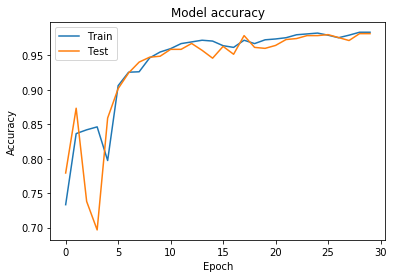

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

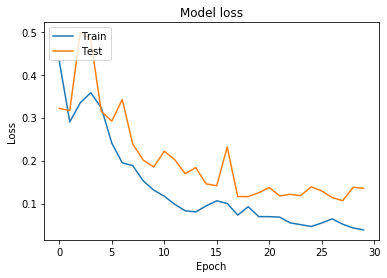

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
 model.save('model.h5')